In [1]:
from pyDFCSR_2D.CSR import *
import matplotlib.pyplot as plt


In [2]:
DtestCSR = CSR2D(input_file= 'input/dipole_config.yaml')


In [3]:
DtestCSR.CSR_params.compute_CSR = 0

In [4]:
DtestCSR.run(stop_time  = 0.6)

Finish step 2 in 0.293179988861084 seconds
Finish step 3 in 0.29254698753356934 seconds
Finish step 4 in 0.27455949783325195 seconds
Finish step 5 in 0.2714359760284424 seconds
Finish step 6 in 0.2907583713531494 seconds
Finish step 7 in 0.2984893321990967 seconds
Finish step 8 in 0.27558326721191406 seconds
Finish step 9 in 0.2903139591217041 seconds
Finish step 10 in 0.33222246170043945 seconds
Finish step 11 in 0.32700228691101074 seconds
Finish step 12 in 0.3510003089904785 seconds
Finish step 13 in 0.3619966506958008 seconds
Finish step 14 in 0.41789722442626953 seconds


In [5]:
DtestCSR.beam.position

0.65

In [22]:
sp = np.linspace(0.649, 0.651, 1000)
xp1, xp2 = DtestCSR.get_localization(x = 0, s = 0.65, t = 0.65, sp = sp)

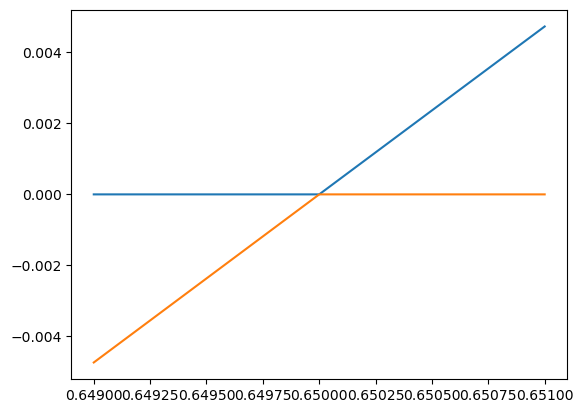

In [23]:
plt.plot(sp, xp1)
plt.plot(sp, xp2)

In [29]:
sigx = DtestCSR.beam.sigma_x
xp = np.linspace(-2*sigx, 2*sigx, 1000)
[xp_mesh, sp_mesh] = np.meshgrid(xp, sp, indexing='ij')
CSR_integrand_z, CSR_integrand_x = DtestCSR.get_CSR_integrand(s = 0.65, t = 0.65, x = 0, xp = xp_mesh, sp = sp_mesh)

In [34]:
def plot_2D_contour(x, y, z):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    surf = ax.imshow(z, extent=(min(x), max(x), min(y), max(y)), origin='lower',  cmap='jet')
    fig.colorbar(surf, shrink=0.5, aspect=5)
    
    #fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.xlabel('y ($ m$)')
    plt.ylabel('x ($ m$)')
    plt.show()

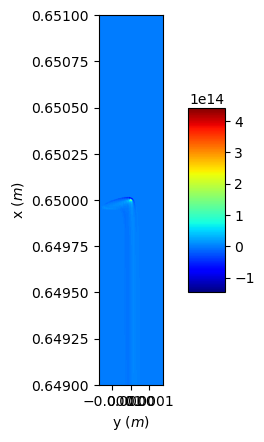

In [35]:
plot_2D_contour(x = xp, y = sp, z = CSR_integrand_z.T)

In [28]:
DtestCSR.beam.slope


array([7.89409271e-01, 3.90510194e-14])

In [29]:
np.arctan(DtestCSR.beam.slope[0])

0.6682497361979917